In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
df = pd.read_csv("/content/spam.csv", encoding="latin-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
v1,0.000000
v2,0.000000
Unnamed: 2,99.102656
Unnamed: 3,99.784637
Unnamed: 4,99.892319


In [ ]:
# df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

403

In [ ]:
# df.drop_duplicates(inplace=True)

In [ ]:
for i in df.select_dtypes(include="object").columns:
  print(i)
  print(df[i].value_counts())
  print("***"*10)

v1
v1
ham     4825
spam     747
Name: count, dtype: int64
******************************
v2
v2
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                       

In [ ]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [ ]:
df = df.iloc[:, :2]
df.columns = ["label", "message"]
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["label"] = df["label"].map({"ham": 0, "spam": 1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['message'] = df['message'].str.lower()

In [ ]:
df['message'] = df['message'].apply(lambda x: re.sub(f"[{string.punctuation}]", "", x))

In [ ]:
df['message'] = df['message'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
df['message'] = df['message'].apply(lambda x: " ".join(x.split()))

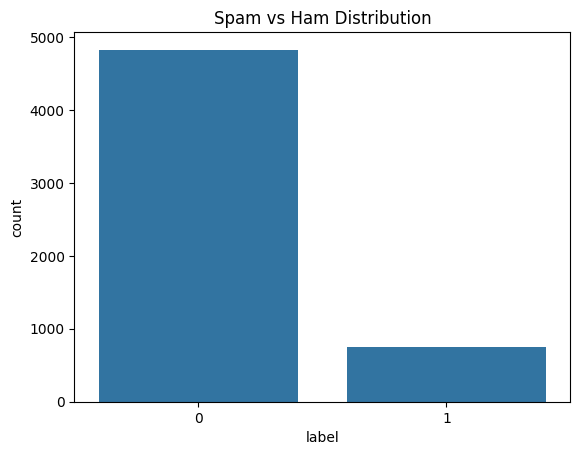

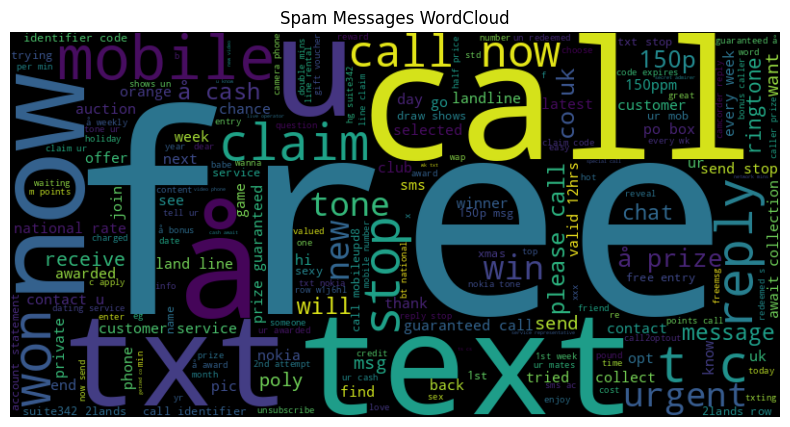

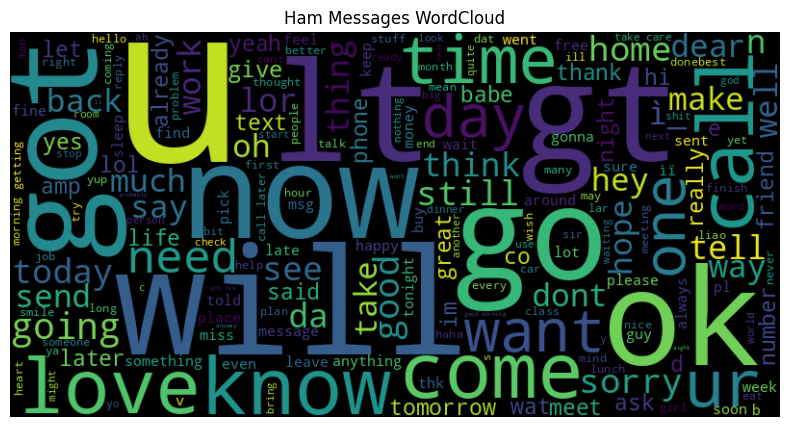

Count Vectorizer Shape: (5572, 8404)
TF-IDF Vectorizer Shape: (5572, 8404)


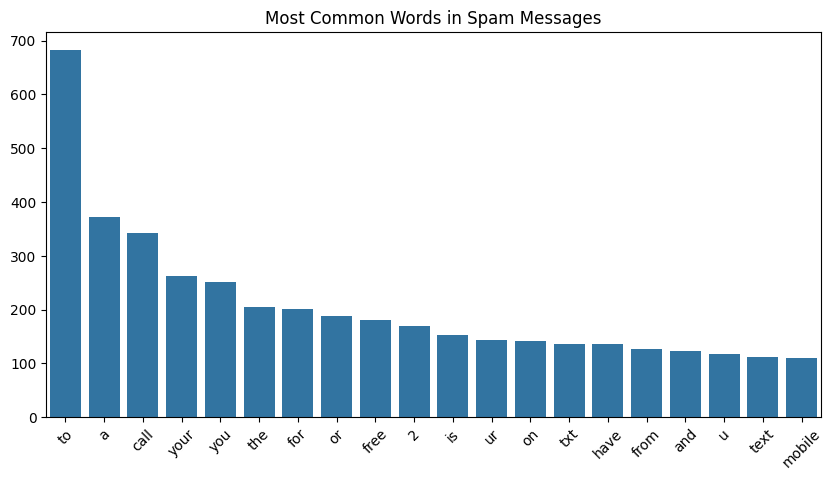

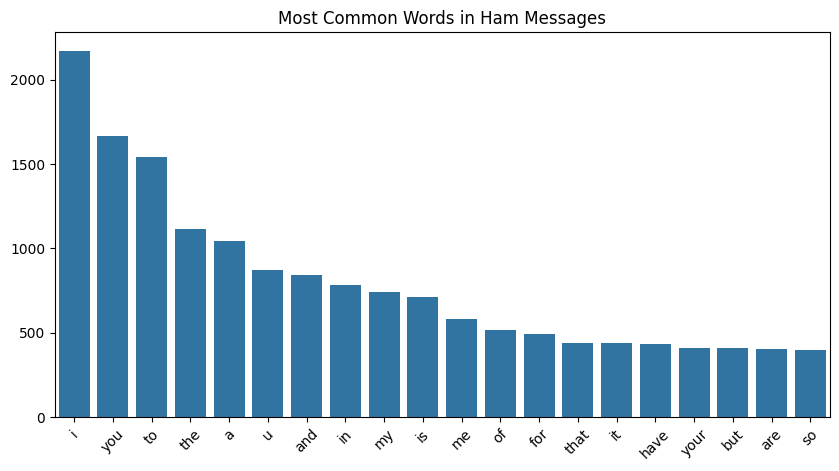

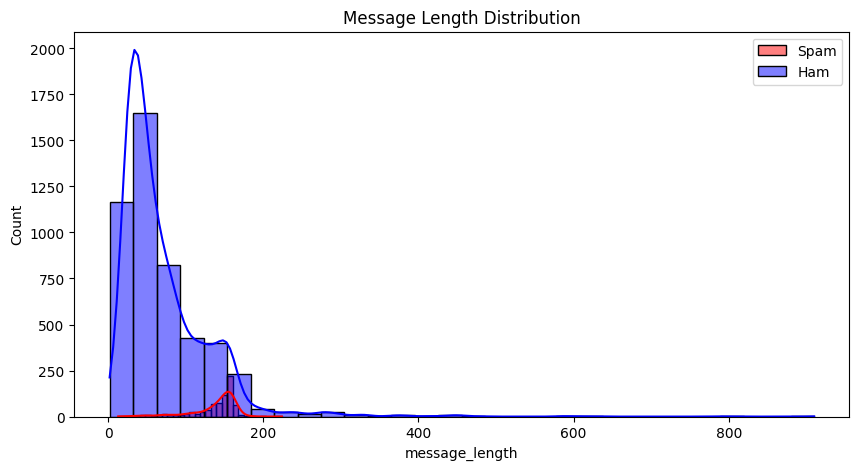

In [ ]:
# Visualizing class distribution
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Distribution')
plt.show()

# WordCloud visualization of spam messages
spam_words = " ".join(df[df['label'] == 1]['message'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Messages WordCloud')
plt.show()

# WordCloud visualization of ham messages
ham_words = " ".join(df[df['label'] == 0]['message'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(ham_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Messages WordCloud')
plt.show()

# Tokenization using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(df['message'])
print("Count Vectorizer Shape:", X_counts.shape)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])
print("TF-IDF Vectorizer Shape:", X_tfidf.shape)

# Displaying most common words in spam messages
spam_corpus = []
for msg in df[df['label'] == 1]['message']:
    spam_corpus.extend(msg.split())
from collections import Counter
spam_counter = Counter(spam_corpus)
most_common_spam = spam_counter.most_common(20)

# Plot most common spam words
plt.figure(figsize=(10,5))
sns.barplot(x=[word[0] for word in most_common_spam], y=[word[1] for word in most_common_spam])
plt.xticks(rotation=45)
plt.title('Most Common Words in Spam Messages')
plt.show()

# Displaying most common words in ham messages
ham_corpus = []
for msg in df[df['label'] == 0]['message']:
    ham_corpus.extend(msg.split())
ham_counter = Counter(ham_corpus)
most_common_ham = ham_counter.most_common(20)

# Plot most common ham words
plt.figure(figsize=(10,5))
sns.barplot(x=[word[0] for word in most_common_ham], y=[word[1] for word in most_common_ham])
plt.xticks(rotation=45)
plt.title('Most Common Words in Ham Messages')
plt.show()

# Check for message length distribution
df['message_length'] = df['message'].apply(len)
plt.figure(figsize=(10,5))
sns.histplot(df[df['label'] == 1]['message_length'], color='red', label='Spam', kde=True, bins=30)
sns.histplot(df[df['label'] == 0]['message_length'], color='blue', label='Ham', kde=True, bins=30)
plt.legend()
plt.title('Message Length Distribution')
plt.show()